# Checkpoint 1

In [3]:
import pandas as pd
import numpy as np



# Read companies and rounds2 files 

In [4]:
companies = pd.read_csv('data/companies.txt', sep='\t',encoding = "palmos")
rounds2 = pd.read_csv('data/rounds2.csv',sep=',',encoding = "palmos")

# Unique companies in companies file

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
uniqueCompanies = companies.groupby(['permalink'])
print(len(uniqueCompanies))

66368


# Unique companies in rounds2 file

In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
companies.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Orginator,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [9]:
rounds2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/4d7469670155924eb50e7c31daf00650,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


# Company difference



In [10]:
companies_permalink = companies['permalink'].apply(lambda x: x.lower())
rounds2_permalink = rounds2['company_permalink'].apply(lambda x: x.lower())

In [11]:
print(len(list(set(rounds2_permalink) - set(companies_permalink))))
print(len(list(set(companies_permalink) - set(rounds2_permalink))))

0
0


# Merging two data frames

In [12]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [13]:
master_frame= pd.merge(companies,rounds2,how='inner', left_on = 'permalink', right_on='company_permalink')

In [14]:
master_frame.shape

(114949, 16)

In [15]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [16]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Funding Types

In [17]:
ventureTypes = master_frame[master_frame.funding_round_type == 'venture']
ventureTypes.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,55494,55494,52549,54362,55494,52619,51698,51940,51940,44303,55494,55494,55494,30985,55494,5.022800e+04
unique,32468,32407,30099,11634,4,103,264,831,3175,2251,32468,55494,1,8,4553,NaN
top,/organization/quellan,Quellan,http://www.quellan.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2007,/organization/quellan,/funding-round/a135f5b7c17eb9ea48120fa37baba5b6,venture,A,01-01-2008,NaN
freq,16,16,16,5673,40748,38372,14980,11061,3463,2379,16,1,55494,14617,203,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174895e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.635207e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600902e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+07


In [18]:
angelTypes = master_frame[master_frame.funding_round_type == 'angel']
angelTypes.describe()

,raised_amount_usd
count,4.860000e+03
mean,9.586945e+05
std,7.404397e+06
min,0.000000e+00
25%,1.500000e+05
50%,4.000000e+05
75%,1.000000e+06
max,4.945120e+08


In [19]:
seedTypes = master_frame[master_frame.funding_round_type == 'seed']
seedTypes.describe()

,raised_amount_usd
count,2.360300e+04
mean,7.198180e+05
std,2.221733e+06
min,0.000000e+00
25%,5.500000e+04
50%,2.750000e+05
75%,1.000000e+06
max,2.000000e+08


In [20]:
private_equityTypes = master_frame[master_frame.funding_round_type == 'private_equity']
private_equityTypes.describe()

,raised_amount_usd
count,1.936000e+03
mean,7.330859e+07
std,1.981135e+08
min,0.000000e+00
25%,5.000000e+06
50%,2.000000e+07
75%,7.500000e+07
max,4.745460e+09


# Checkpoint 2

# Deciding the best round type for investment

In [21]:
ventureTypesFrame = ventureTypes[(ventureTypes.raised_amount_usd < 15000000) & (ventureTypes.raised_amount_usd > 5000000)]
ventureTypesFrame.describe()

,raised_amount_usd
count,1.379900e+04
mean,8.890294e+06
std,2.539501e+06
min,5.000001e+06
25%,6.685472e+06
50%,8.513737e+06
75%,1.050000e+07
max,1.500000e+07


In [22]:
angelTypesFrame = angelTypes[(angelTypes.raised_amount_usd < 15000000) & (angelTypes.raised_amount_usd > 5000000)]
angelTypesFrame.describe()

,raised_amount_usd
count,5.300000e+01
mean,7.816784e+06
std,2.184156e+06
min,5.020000e+06
25%,6.000000e+06
50%,7.100000e+06
75%,1.000000e+07
max,1.300000e+07


In [23]:
seedTypesFrame = seedTypes[(seedTypes.raised_amount_usd < 15000000) & (seedTypes.raised_amount_usd > 5000000)]
seedTypesFrame.describe()

,raised_amount_usd
count,1.450000e+02
mean,7.047692e+06
std,1.892263e+06
min,5.010000e+06
25%,5.800000e+06
50%,6.300000e+06
75%,7.900000e+06
max,1.408135e+07


In [24]:
private_equityFrame = private_equityTypes[(private_equityTypes.raised_amount_usd < 15000000) & (private_equityTypes.raised_amount_usd > 5000000)]
private_equityFrame.describe()

,raised_amount_usd
count,3.610000e+02
mean,9.287035e+06
std,2.664939e+06
min,5.000822e+06
25%,6.885882e+06
50%,9.529196e+06
75%,1.125880e+07
max,1.500000e+07


#  Checkpoint 3: Country Analysis

In [25]:
ventureTypesFrame.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,13799,13799,13056,13639,13799,13211,13013,13054,13054,11343,13799,13799,13799,9625,13799,1.379900e+04
unique,10569,10563,9884,4346,4,71,191,497,1410,960,10569,13799,1,8,3528,NaN
top,/organization/biodesix,Biodesix,http://www.biodesix.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2005,/organization/biodesix,/funding-round/c04b444ef68b7654880ddd1af79921b9,venture,A,01-01-2008,NaN
freq,8,8,8,1302,9357,10052,4512,3546,1016,612,8,1,13799,3917,48,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.890294e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.539501e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000001e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.685472e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.513737e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050000e+07


In [26]:
ventureTypesFrame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0
50,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0
52,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,/organization/1006-tv,/funding-round/b6aeb7401ec6993f92a16cbca153b600,venture,B,31-07-2014,10000000.0
99,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0
100,/organization/123greetings,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0
103,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
112,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0
113,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0


In [27]:
groupedVentureFrame = ventureTypesFrame.groupby('country_code')

In [28]:
groupedVentureFrame.agg({'country_code':'count'}).sort_values(by='country_code',ascending='True')[-9:]

,country_code
country_code,
SWE,63
DEU,189
FRA,239
IND,244
ISR,247
CAN,369
CHN,408
GBR,567
USA,10052


In [29]:
countryFrame= ventureTypesFrame.groupby('country_code')

In [30]:
investmentFrame = pd.DataFrame(countryFrame['raised_amount_usd'].sum())
top9 = investmentFrame.reset_index().sort_values('raised_amount_usd', ascending='True')[-9:]

In [31]:
top9

,country_code,raised_amount_usd
11,CHE,5.588196e+08
17,DEU,1.635026e+09
23,FRA,2.022425e+09
29,IND,2.186544e+09
32,ISR,2.250306e+09
10,CAN,3.192010e+09
13,CHN,3.861561e+09
24,GBR,4.941844e+09
68,USA,8.960135e+10


# Checkpoint 4

In [32]:
map = pd.read_csv('data/mapping.csv',encoding='palmos')

In [33]:
map

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [34]:
ventureTypesFrame.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,13799,13799,13056,13639,13799,13211,13013,13054,13054,11343,13799,13799,13799,9625,13799,1.379900e+04
unique,10569,10563,9884,4346,4,71,191,497,1410,960,10569,13799,1,8,3528,NaN
top,/organization/biodesix,Biodesix,http://www.biodesix.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2005,/organization/biodesix,/funding-round/c04b444ef68b7654880ddd1af79921b9,venture,A,01-01-2008,NaN
freq,8,8,8,1302,9357,10052,4512,3546,1016,612,8,1,13799,3917,48,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.890294e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.539501e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000001e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.685472e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.513737e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050000e+07


In [35]:
ventureTypesFrame.category_list.isnull().values.sum()

160

# Imputing content

In [36]:
ventureTypesFrame.loc[ventureTypesFrame.category_list.isnull().values, ['category_list']] = 'Blanks'

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
ventureTypesFrame.category_list.isnull().values.sum()

0

In [38]:
ventureTypesFrame['primary_sector'] = ventureTypesFrame['category_list'].apply(lambda x : x.split('|')[0])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
map

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [40]:
ventureTypesFrame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,Local Businesses
50,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0,Cosmetics
52,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,/organization/1006-tv,/funding-round/b6aeb7401ec6993f92a16cbca153b600,venture,B,31-07-2014,10000000.0,Games
99,/organization/123feng-com,123Feng.Com,http://123feng.com/,Blanks,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0,Blanks
100,/organization/123greetings,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0,Internet
103,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,Service Providers
112,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,Manufacturing
113,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0,Manufacturing


In [41]:
mapping = pd.melt(map,id_vars='category_list')
mapping = mapping[mapping['value'] != 0]

In [42]:
mapping = mapping.rename(columns={'category_list':'primary_sector','variable':'main_sector'})

In [43]:
mapping

,primary_sector,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [44]:
mergedFrame = pd.merge(ventureTypesFrame ,mapping,how='inner', left_on = 'primary_sector', right_on='primary_sector')

## Primary sector and main sector merged

In [45]:
mergedFrame.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
count,13588,13588,12896,13588,13588,13061,12868,12905,12905,11266,13588,13588,13588,9489,13588,1.358800e+04,13588,13588,13588.0
unique,10371,10365,9737,4334,4,71,191,494,1392,954,10371,13588,1,8,3505,NaN,449,8,NaN
top,/organization/biodesix,Biodesix,http://www.biodesix.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2005,/organization/biodesix,/funding-round/c04b444ef68b7654880ddd1af79921b9,venture,A,01-01-2008,NaN,Biotechnology,Others,NaN
freq,8,8,8,1302,9233,9942,4465,3514,1012,609,8,1,13588,3853,48,NaN,1635,3300,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.892489e+06,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.538457e+06,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000001e+06,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.699531e+06,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.517661e+06,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050000e+07,NaN,NaN,1.0


# Checkpoint 5

In [46]:
D1 = mergedFrame[mergedFrame['country_code']=='USA']
D2 = mergedFrame[mergedFrame['country_code']=='GBR']
D3 = mergedFrame[mergedFrame['country_code']=='CAN']

In [47]:
D11 = D1.groupby('main_sector').agg({'main_sector':'count'}).add_suffix('_count').reset_index()
D22 = D2.groupby('main_sector').agg({'main_sector':'count'}).add_suffix('_count').reset_index()
D33 = D3.groupby('main_sector').agg({'main_sector':'count'}).add_suffix('_count').reset_index()

In [48]:
D1= pd.merge(D1,D11,how='inner', left_on = 'main_sector', right_on='main_sector')
D2= pd.merge(D2,D22,how='inner', left_on = 'main_sector', right_on='main_sector')
D3= pd.merge(D3,D33,how='inner', left_on = 'main_sector', right_on='main_sector')

In [49]:
D111 = D1.groupby(['main_sector'])['raised_amount_usd'].agg('sum').reset_index().rename(columns={'raised_amount_usd':'raised_amount_usd_sum'})
D222 = D2.groupby(['main_sector'])['raised_amount_usd'].agg('sum').reset_index().rename(columns={'raised_amount_usd':'raised_amount_usd_sum'})
D333 = D3.groupby(['main_sector'])['raised_amount_usd'].agg('sum').reset_index().rename(columns={'raised_amount_usd':'raised_amount_usd_sum'})

In [50]:
D1= pd.merge(D1,D111,how='inner', left_on = 'main_sector', right_on='main_sector')
D2= pd.merge(D2,D222,how='inner', left_on = 'main_sector', right_on='main_sector')
D3= pd.merge(D3,D333,how='inner', left_on = 'main_sector', right_on='main_sector')

In [51]:
D1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,479,4.119198e+09
1,/organization/newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,...,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,Media,Entertainment,1,479,4.119198e+09
2,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Media,Entertainment,1,479,4.119198e+09
3,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Media,Entertainment,1,479,4.119198e+09
4,/organization/plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,...,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,Media,Entertainment,1,479,4.119198e+09
5,/organization/songbird,Songbird,http://getsongbird.net/,Media|Mobile|Music|Open Source,closed,USA,CA,SF Bay Area,San Francisco,01-02-2006,...,/funding-round/61869a104bbc2ea3669f9b32459029b7,venture,A,01-12-2006,8000000.0,Media,Entertainment,1,479,4.119198e+09
6,/organization/vadio,Vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NaN,...,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7500000.0,Media,Entertainment,1,479,4.119198e+09
7,/organization/7-star-entertainment,7 Star Entertainment,http://www.7starent.com,Games,operating,USA,FL,Ft. Lauderdale,Pompano Beach,NaN,...,/funding-round/7db2e0412185f592d15df25f0e76c313,venture,NaN,14-07-2010,10000000.0,Games,Entertainment,1,479,4.119198e+09
8,/organization/8dworld,8D World,http://www.8dworld.com/English/Home.html,Games|Virtual Worlds,closed,USA,MA,Boston,Woburn,NaN,...,/funding-round/ab2db8ac1e851867a37b3880a2eda6b0,venture,B,09-12-2010,5250000.0,Games,Entertainment,1,479,4.119198e+09
9,/organization/8dworld,8D World,http://www.8dworld.com/English/Home.html,Games|Virtual Worlds,closed,USA,MA,Boston,Woburn,NaN,...,/funding-round/ca5833d22f42a788838850faf2774f3e,venture,A,01-03-2008,7000000.0,Games,Entertainment,1,479,4.119198e+09


# Checkpoint 5 analysis

In [52]:
D1.describe()

,raised_amount_usd,value,main_sector_count,raised_amount_usd_sum
count,9.942000e+03,9942.0,9942.000000,9.942000e+03
mean,8.915540e+06,1.0,1763.334540,1.573315e+10
std,2.532909e+06,0.0,680.187309,6.084054e+09
min,5.000001e+06,1.0,142.000000,1.269104e+09
25%,6.800000e+06,1.0,1280.000000,1.121957e+10
50%,8.568588e+06,1.0,1951.000000,1.780163e+10
75%,1.060000e+07,1.0,2216.000000,1.939738e+10
max,1.500000e+07,1.0,2423.000000,2.173601e+10


In [53]:
D2.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
count,559,559,533,559,559,559,546,532,532,443,...,559,559,349,559,5.590000e+02,559,559,559.0,559.000000,5.590000e+02
unique,464,464,440,237,4,1,71,53,115,128,...,559,1,6,502,NaN,114,8,NaN,NaN,NaN
top,/organization/autoquake,Celltick Technologies,http://www.electric-cloud.com,Biotechnology,operating,GBR,H9,London,London,01-01-2005,...,/funding-round/f7b76bf555e5619fbe259f697f5fd97e,venture,A,15-09-2014,NaN,Biotechnology,Others,NaN,NaN,NaN
freq,4,4,4,59,422,559,251,377,251,29,...,1,559,174,3,NaN,69,129,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.721339e+06,NaN,NaN,1.0,97.744186,8.479490e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.601255e+06,NaN,NaN,0.0,38.116507,3.296446e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.005659e+06,NaN,NaN,1.0,14.000000,1.370516e+08
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.396522e+06,NaN,NaN,1.0,65.000000,5.657462e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.100000e+06,NaN,NaN,1.0,118.000000,9.744040e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.051506e+07,NaN,NaN,1.0,124.000000,1.110140e+09


In [54]:
D3.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
count,366,366,346,366,366,366,362,362,362,296,...,366,366,235,366,3.660000e+02,366,366,366.0,366.000000,3.660000e+02
unique,298,298,280,154,4,1,8,22,43,78,...,366,1,5,354,NaN,95,8,NaN,NaN,NaN
top,/organization/fresco-microchip,Fresco Microchip,http://www.frescomicrochip.com,Software,operating,CAN,ON,Toronto,Toronto,01-01-2004,...,/funding-round/119659cb521dc37c250facadf77442f5,venture,A,01-07-2007,NaN,Software,Others,NaN,NaN,NaN
freq,4,4,4,51,257,366,192,147,95,22,...,1,366,107,2,NaN,54,98,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.631940e+06,NaN,NaN,1.0,73.377049,6.439814e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.529676e+06,NaN,NaN,0.0,30.230438,2.810864e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.045000e+06,NaN,NaN,1.0,1.000000,1.000000e+07
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.500000e+06,NaN,NaN,1.0,40.000000,3.501211e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.000000e+06,NaN,NaN,1.0,98.000000,8.511380e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000e+07,NaN,NaN,1.0,98.000000,9.058876e+08


In [55]:
D1_investment = D1.raised_amount_usd.sum()
D2_investment = D2.raised_amount_usd.sum()
D3_investment = D3.raised_amount_usd.sum()

In [56]:
D1_investment,D2_investment,D3_investment

(88638294664.0, 4875228300.0, 3159289960.0)

In [57]:
D1.sort_values('main_sector_count', ascending = False).groupby('main_sector').describe()

main_sector_count               \
                                                    count    mean  std   
main_sector                                                              
Automotive & Sports                                 142.0   142.0  0.0   
Cleantech / Semiconductors                         1951.0  1951.0  0.0   
Entertainment                                       479.0   479.0  0.0   
Health                                              760.0   760.0  0.0   
Manufacturing                                       691.0   691.0  0.0   
News, Search and Messaging                         1280.0  1280.0  0.0   
Others                                             2423.0  2423.0  0.0   
Social, Finance, Analytics, Advertising            2216.0  2216.0  0.0   

                                                                         \
                                            min     25%     50%     75%   
main_sector                                                               
Automotive & Sports                       142.0   142.0   142.0   142.0   
Cleantech / Semiconductors               1951.0  1951.0  1951.0  1951.0   
Entertainment                             479.0   479.0   479.0   479.0   
Health                                    760.0   760.0   760.0   760.0   
Manufacturing                             691.0   691.0   691.0   691.0   
News, Search and Messaging               1280.0  1280.0  1280.0  1280.0   
Others                                   2423.0  2423.0  2423.0  2423.0   
Social, Finance, Analytics, Advertising  2216.0  2216.0  2216.0  2216.0   

                                                raised_amount_usd  \
                                            max             count   
main_sector                                                         
Automotive & Sports                       142.0             142.0   
Cleantech / Semiconductors               1951.0            1951.0   
Entertainment                             479.0             479.0   
Health                                    760.0             760.0   
Manufacturing                             691.0             691.0   
News, Search and Messaging               1280.0            1280.0   
Others                                   2423.0            2423.0   
Social, Finance, Analytics, Advertising  2216.0            2216.0   

                                                      ...   \
                                                 mean ...    
main_sector                                           ...    
Automotive & Sports                      8.937355e+06 ...    
Cleantech / Semiconductors               9.124361e+06 ...    
Entertainment                            8.599578e+06 ...    
Health                                   9.035341e+06 ...    
Manufacturing                            9.013825e+06 ...    
News, Search and Messaging               8.765287e+06 ...    
Others                                   8.970700e+06 ...    
Social, Finance, Analytics, Advertising  8.753329e+06 ...    

                                        raised_amount_usd_sum                \
                                                          75%           max   
main_sector                                                                   
Automotive & Sports                              1.269104e+09  1.269104e+09   
Cleantech / Semiconductors                       1.780163e+10  1.780163e+10   
Entertainment                                    4.119198e+09  4.119198e+09   
Health                                           6.866859e+09  6.866859e+09   
Manufacturing                                    6.228553e+09  6.228553e+09   
News, Search and Messaging                       1.121957e+10  1.121957e+10   
Others                                           2.173601e+10  2.173601e+10   
Social, Finance, Analytics, Advertising          1.939738e+10  1.939738e+10   

                                          value                                \
     

In [58]:
D2.sort_values('main_sector_count', ascending = False).groupby('main_sector').describe()

main_sector_count                     \
                                                    count   mean  std    min   
main_sector                                                                    
Automotive & Sports                                  14.0   14.0  0.0   14.0   
Cleantech / Semiconductors                          124.0  124.0  0.0  124.0   
Entertainment                                        48.0   48.0  0.0   48.0   
Health                                               23.0   23.0  0.0   23.0   
Manufacturing                                        38.0   38.0  0.0   38.0   
News, Search and Messaging                           65.0   65.0  0.0   65.0   
Others                                              129.0  129.0  0.0  129.0   
Social, Finance, Analytics, Advertising             118.0  118.0  0.0  118.0   

                                                                     \
                                           25%    50%    75%    max   
main_sector                                                           
Automotive & Sports                       14.0   14.0   14.0   14.0   
Cleantech / Semiconductors               124.0  124.0  124.0  124.0   
Entertainment                             48.0   48.0   48.0   48.0   
Health                                    23.0   23.0   23.0   23.0   
Manufacturing                             38.0   38.0   38.0   38.0   
News, Search and Messaging                65.0   65.0   65.0   65.0   
Others                                   129.0  129.0  129.0  129.0   
Social, Finance, Analytics, Advertising  118.0  118.0  118.0  118.0   

                                        raised_amount_usd               ...   \
                                                    count          mean ...    
main_sector                                                             ...    
Automotive & Sports                                  14.0  9.789398e+06 ...    
Cleantech / Semiconductors                          124.0  8.952739e+06 ...    
Entertainment                                        48.0  8.808014e+06 ...    
Health                                               23.0  9.110327e+06 ...    
Manufacturing                                        38.0  8.735272e+06 ...    
News, Search and Messaging                           65.0  8.703788e+06 ...    
Others                                              129.0  8.710266e+06 ...    
Social, Finance, Analytics, Advertising             118.0  8.257661e+06 ...    

                                        raised_amount_usd_sum                \
                                                          75%           max   
main_sector                                                                   
Automotive & Sports                              1.370516e+08  1.370516e+08   
Cleantech / Semiconductors                       1.110140e+09  1.110140e+09   
Entertainment                                    4.227847e+08  4.227847e+08   
Health                                           2.095375e+08  2.095375e+08   
Manufacturing                                    3.319403e+08  3.319403e+08   
News, Search and Messaging                       5.657462e+08  5.657462e+08   
Others                                           1.123624e+09  1.123624e+09   
Social, Finance, Analytics, Advertising          9.744040e+08  9.744040e+08   

                                         value                                \
                                         count mean  std  min  25%  50%  75%   
main_sector                                                                    
Automotive & Sports                       14.0  1.0  0.0  1.0  1.0  1.0  1.0   
Cleantech / Semiconductors               124.0  1.0  0.0  1.0  1.0  1.0  1.0   
Entertainment                             48.0  1.0  0.0  1.0  1.0  1.0  1.0   
Health                                    23.0  1.0  0.0  1.0  1.0  1.0  1.0   
Manufacturing                             38.0  1.0  0.0  1.0  1.0

In [59]:
D3.sort_values('main_sector_count', ascending = False).groupby('main_sector').describe()

main_sector_count                   \
                                                    count  mean  std   min   
main_sector                                                                  
Automotive & Sports                                   1.0   1.0  NaN   1.0   
Cleantech / Semiconductors                           98.0  98.0  0.0  98.0   
Entertainment                                        14.0  14.0  0.0  14.0   
Health                                               19.0  19.0  0.0  19.0   
Manufacturing                                        27.0  27.0  0.0  27.0   
News, Search and Messaging                           40.0  40.0  0.0  40.0   
Others                                               98.0  98.0  0.0  98.0   
Social, Finance, Analytics, Advertising              69.0  69.0  0.0  69.0   

                                                                 \
                                          25%   50%   75%   max   
main_sector                                                       
Automotive & Sports                       1.0   1.0   1.0   1.0   
Cleantech / Semiconductors               98.0  98.0  98.0  98.0   
Entertainment                            14.0  14.0  14.0  14.0   
Health                                   19.0  19.0  19.0  19.0   
Manufacturing                            27.0  27.0  27.0  27.0   
News, Search and Messaging               40.0  40.0  40.0  40.0   
Others                                   98.0  98.0  98.0  98.0   
Social, Finance, Analytics, Advertising  69.0  69.0  69.0  69.0   

                                        raised_amount_usd               ...   \
                                                    count          mean ...    
main_sector                                                             ...    
Automotive & Sports                                   1.0  1.000000e+07 ...    
Cleantech / Semiconductors                           98.0  9.243751e+06 ...    
Entertainment                                        14.0  7.501576e+06 ...    
Health                                               19.0  8.333951e+06 ...    
Manufacturing                                        27.0  7.690114e+06 ...    
News, Search and Messaging                           40.0  8.753028e+06 ...    
Others                                               98.0  8.685081e+06 ...    
Social, Finance, Analytics, Advertising              69.0  8.277436e+06 ...    

                                        raised_amount_usd_sum               \
                                                          75%          max   
main_sector                                                                  
Automotive & Sports                                10000000.0   10000000.0   
Cleantech / Semiconductors                        905887607.0  905887607.0   
Entertainment                                     105022068.0  105022068.0   
Health                                            158345064.0  158345064.0   
Manufacturing                                     207633071.0  207633071.0   
News, Search and Messaging                        350121113.0  350121113.0   
Others                                            851137962.0  851137962.0   
Social, Finance, Analytics, Advertising           571143075.0  571143075.0   

                                        value                                \
                                        count mean  std  min  25%  50%  75%   
main_sector                                                                   
Automotive & Sports                       1.0  1.0  NaN  1.0  1.0  1.0  1.0   
Cleantech / Semiconductors               98.0  1.0  0.0  1.0  1.0  1.0  1.0   
Entertainment                            14.0  1.0  0.0  1.0  1.0  1.0  1.0   
Health                                   19.0  1.0  0.0  1.0  1.0  1.0  1.0   
Manufacturing                            27.0  1.0  0.0  1.0  1.0  1.0  1.0   
News, Search and Messaging               40.0  1.0  0.0  1.0  1.0  1.0 

In [60]:
D1_others = D1[D1.main_sector == 'Others']
D2_others = D2[D2.main_sector == 'Others']
D3_others = D3[(D3.main_sector == 'Others') | (D3.main_sector == 'Cleantech / Semiconductors')]

In [61]:
D1_others.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
6348,/organization/spidercloud-wireless,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,01-01-2007,...,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NaN,06-01-2015,14999999.0,Enterprise Software,Others,1,2423,2.173601e+10
6786,/organization/redfin,Redfin,http://redfin.com,Real Estate,operating,USA,WA,Seattle,Seattle,01-10-2004,...,/funding-round/8971121cb6408b7cbbb1f7781a7619ba,venture,E,27-10-2011,14800000.0,Real Estate,Others,1,2423,2.173601e+10
6534,/organization/onstor,ONStor,http://www.onstor.com,Web Hosting,acquired,USA,CA,SF Bay Area,Campbell,01-01-2000,...,/funding-round/2b3c1d1a478c1562088c1f49fec1485c,venture,F,18-04-2008,14800000.0,Web Hosting,Others,1,2423,2.173601e+10
5816,/organization/paynearme,PayNearMe,http://www.paynearme.com,E-Commerce|Government Innovation|Payments|Prop...,operating,USA,CA,SF Bay Area,Sunnyvale,01-03-2009,...,/funding-round/11d1cdb33757026d636e779082095534,venture,F,06-04-2015,14699988.0,E-Commerce,Others,1,2423,2.173601e+10
6686,/organization/lockdown-networks,Lockdown Networks,http://www.lockdownnetworks.com,Security,acquired,USA,WA,Seattle,Seattle,01-01-2001,...,/funding-round/c1d3b2e9c422fda144283fdbf8a24507,venture,B,13-11-2007,14680000.0,Security,Others,1,2423,2.173601e+10
5441,/organization/softricity,Softricity,NaN,Software|Virtualization,acquired,USA,MA,Boston,Boston,01-01-1999,...,/funding-round/e18fdfc80958eedba1814a7ac299da86,venture,C,29-07-2002,14600000.0,Software,Others,1,2423,2.173601e+10
6672,/organization/interface-security-systems,Interface Security Systems,http://www.interfacesystems.com,Security,operating,USA,TX,Dallas,Plano,NaN,...,/funding-round/d6290595ef0190d2cd9a3ea63741500b,venture,NaN,15-04-2009,14560000.0,Security,Others,1,2423,2.173601e+10
6473,/organization/beers-enterprises,Beers Enterprises,http://www.theswitch.tv,Web Hosting,operating,USA,MA,Cape Cod,Osterville,01-01-1991,...,/funding-round/718a50e571164ea9bf7c6bffd248538c,venture,NaN,28-04-2015,14525184.0,Web Hosting,Others,1,2423,2.173601e+10
5910,/organization/dreambox-learning,DreamBox Learning,http://www.dreambox.com,EdTech|Education|Software|Tutoring,operating,USA,WA,Seattle,Bellevue,08-06-2004,...,/funding-round/d66983e6c91becf397f738cb6747b14c,venture,A,17-12-2013,14500000.0,EdTech,Others,1,2423,2.173601e+10
5967,/organization/aprimo,Aprimo,http://www.aprimo.com,Enterprise Software,acquired,USA,IN,Indianapolis,Indianapolis,01-01-1998,...,/funding-round/d748164969a8407d9f72c7203172f700,venture,NaN,01-01-2005,14500000.0,Enterprise Software,Others,1,2423,2.173601e+10


In [62]:
D2_others.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
224,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,...,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.0,E-Commerce,Others,1,129,1.123624e+09
231,/organization/ukash,KaliteUKASH,http://www.kaliteukash.com,E-Commerce|Finance|FinTech|P2P Money Transfer|...,operating,GBR,H9,London,London,01-01-2001,...,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,NaN,29-09-2008,14400000.0,E-Commerce,Others,1,129,1.123624e+09
226,/organization/ocapo,Ocapo,NaN,E-Commerce,operating,GBR,H9,London,London,01-01-2013,...,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,A,04-07-2013,14394888.0,E-Commerce,Others,1,129,1.123624e+09
285,/organization/state,State,http://www.state.com,Open Source|Opinions|Social Media|Startups,operating,GBR,H9,London,London,01-01-2010,...,/funding-round/fba0d73e808772419ab719980205392e,venture,NaN,19-02-2013,14000000.0,Open Source,Others,1,129,1.123624e+09
238,/organization/enigmatic,Enigmatec,http://enigmatec.com,Enterprise Software,closed,GBR,H9,London,London,01-04-2002,...,/funding-round/9cca5e2bdd43617c1efcb4b6174a4c17,venture,D,06-08-2008,14000000.0,Enterprise Software,Others,1,129,1.123624e+09
170,/organization/celona-technologies,Celona Technologies,http://www.celona.com,Software,closed,GBR,H9,London,London,01-01-2005,...,/funding-round/495fda48b04605e30d61bd2cdd73c2a5,venture,B,09-07-2007,14000000.0,Software,Others,1,129,1.123624e+09
220,/organization/lyst,Lyst,http://www.lyst.com,E-Commerce|Fashion|Technology,operating,GBR,H9,London,London,01-01-2010,...,/funding-round/238744109fca9bc27d3e23513d988894,venture,B,23-01-2014,14000000.0,E-Commerce,Others,1,129,1.123624e+09
208,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,...,/funding-round/064999587157b0ceae7843204a105d6d,venture,NaN,28-09-2015,13359377.0,E-Commerce,Others,1,129,1.123624e+09
223,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,...,/funding-round/2b26a11dcffeb3bf8fd33406840f4f3f,venture,C,16-12-2013,13038376.0,E-Commerce,Others,1,129,1.123624e+09
273,/organization/alfresco,Alfresco,http://www.alfresco.com,Document Management|Enterprises|Enterprise Sof...,operating,GBR,P9,London,Maidenhead,01-01-2005,...,/funding-round/0db504d02c87c2b963283fd3c6d17594,venture,C,22-01-2008,13000000.0,Document Management,Others,1,129,1.123624e+09


In [63]:
D3_others.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
183,/organization/newstep,NewStep Networks,NaN,Software,operating,CAN,ON,Toronto,Toronto,01-01-2003,...,/funding-round/21f659f9767b4b9992ec30cce9b9eb53,venture,A,07-03-2003,14967853.0,Software,Others,1,98,851137962.0
294,/organization/fresco-microchip,Fresco Microchip,http://www.frescomicrochip.com,Semiconductors,operating,CAN,ON,Toronto,Markham,01-01-2004,...,/funding-round/60cf99703c0900a4c1fc9d495dcc6307,venture,A,20-07-2005,14700000.0,Semiconductors,Cleantech / Semiconductors,1,98,905887607.0
256,/organization/cynapsus-therapeutics,Cynapsus Therapeutics,http://cynapsus.ca,Biotechnology,ipo,CAN,ON,Toronto,Toronto,01-01-2004,...,/funding-round/d69f022836126cab5d0e644c21951e59,venture,NaN,21-04-2014,14546285.0,Biotechnology,Cleantech / Semiconductors,1,98,905887607.0
328,/organization/ostara,Ostara,http://www.ostara.com,Clean Technology,operating,CAN,BC,Vancouver,Vancouver,01-01-2005,...,/funding-round/8ecd540541bcd471ee353dba5faa4560,venture,NaN,31-05-2012,14500000.0,Clean Technology,Cleantech / Semiconductors,1,98,905887607.0
252,/organization/aquinox-pharmaceuticals,Aquinox Pharmaceuticals,http://www.aqxpharma.com,Biotechnology|Health Care,ipo,CAN,BC,Vancouver,Vancouver,01-01-2004,...,/funding-round/aab371c3f7e91aba4d04e9d314288869,venture,A,12-06-2007,14500000.0,Biotechnology,Cleantech / Semiconductors,1,98,905887607.0
293,/organization/fresco-microchip,Fresco Microchip,http://www.frescomicrochip.com,Semiconductors,operating,CAN,ON,Toronto,Markham,01-01-2004,...,/funding-round/58d8f60dc0fd18769564089fd3b55e5b,venture,B,15-01-2008,14300000.0,Semiconductors,Cleantech / Semiconductors,1,98,905887607.0
212,/organization/blueprint-software-systems,Blueprint Software Systems,http://www.blueprintsys.com,Enterprise Software,operating,CAN,ON,Toronto,Toronto,01-01-2004,...,/funding-round/5be369a12cfe38efa81f1affc283ca09,venture,NaN,28-05-2010,14300000.0,Enterprise Software,Others,1,98,851137962.0
344,/organization/energy-51,Energy 51,http://www.energy51.ca/,Gas|Natural Resources|Oil,closed,CAN,AB,Calgary,Calgary,NaN,...,/funding-round/01a683b55d086e594509765ae981e5e8,venture,NaN,25-05-2005,14116229.0,Gas,Cleantech / Semiconductors,1,98,905887607.0
290,/organization/d-wave-systems,D-Wave Systems,http://www.dwavesys.com,Semiconductors,operating,CAN,BC,Burnaby,Burnaby,01-01-1999,...,/funding-round/e2c0dfe030eeba31da14007075f3c4be,venture,B,16-05-2006,14000000.0,Semiconductors,Cleantech / Semiconductors,1,98,905887607.0
244,/organization/lxdata,LxDATA,http://www.lxsix.com,Marketplaces|Mechanical Solutions|Sensors,operating,CAN,QC,Quebec City,Quebec,NaN,...,/funding-round/963dca1f42751a265102f4b06d8a289a,venture,NaN,07-10-2008,14000000.0,Marketplaces,Others,1,98,851137962.0


In [64]:
D1_second = D1[D1.main_sector == 'Social, Finance, Analytics, Advertising']
D2_second = D2[D2.main_sector == 'Cleantech / Semiconductors']
D3_second = D3[D3.main_sector == 'Social, Finance, Analytics, Advertising']

In [65]:
D1_second.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
1278,/organization/flite,Flite,http://flite.com,Advertising|Brand Marketing|Mobile Advertising...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2006,...,/funding-round/ab9533c7fc7d6ee635f5e13d4d9c0b44,venture,NaN,09-07-2012,14999997.0,Advertising,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2523,/organization/idle-gaming,Idle Gaming,http://idle-gaming.com,Facebook Applications|Games|Social Games,operating,USA,CA,SF Bay Area,San Francisco,01-11-2009,...,/funding-round/b834e47f511d38d7b07eef62a0c7dc44,venture,B,21-11-2011,14925645.0,Facebook Applications,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2201,/organization/tut-systems,Tut Systems,NaN,Public Relations,operating,USA,OR,"Portland, Oregon",Lake Oswego,01-01-1983,...,/funding-round/abf28f6c3ac177513045d30dd99e0aae,venture,NaN,19-07-2005,14900000.0,Public Relations,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2646,/organization/justrite-manufacturing,Justrite Manufacturing,http://www.justritemfg.com,Machine Learning|Product Development Services,acquired,USA,IL,"Springfield, Illinois",Mattoon,01-01-1906,...,/funding-round/05a1fcb93f923d7d35aa843c8a962879,venture,NaN,20-02-2014,14800000.0,Machine Learning,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2445,/organization/mocana,Mocana,http://www.mocana.com,Cyber|Mobile Security|Security,operating,USA,CA,SF Bay Area,San Francisco,01-01-2004,...,/funding-round/64c558ef069c513eb40214e2955cb196,venture,E,24-07-2015,14763004.0,Cyber,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
1187,/organization/blackarrow,BlackArrow,http://www.blackarrow.tv,Advertising,acquired,USA,CA,SF Bay Area,San Jose,01-01-2005,...,/funding-round/6d8b63a696cc21117c93082039b13df3,venture,B,13-11-2006,14750000.0,Advertising,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2491,/organization/calient-technologies,Calient Technologies,http://www.calient.net,Data Centers|Networking,operating,USA,CA,Santa Barbara,Goleta,01-01-1999,...,/funding-round/bda962d779551c3636ad2699464191bc,venture,NaN,26-03-2015,14749343.0,Data Centers,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
1803,/organization/plumchoice,Call 1-855-276 2781 for QuickBooks Support Pho...,http://www.qbhub.com,Consulting,operating,USA,MA,Boston,Billerica,01-01-2001,...,/funding-round/0b159c96a7dce790afd0a66ef08fc1cb,venture,NaN,08-09-2009,14700000.0,Consulting,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2060,/organization/prosper,Prosper,http://www.prosper.com,Credit|Crowdfunding|Finance|FinTech|Marketplac...,operating,USA,CA,SF Bay Area,San Francisco,01-02-2006,...,/funding-round/2f58a8d316c41dc157cb0e1eb0284efc,venture,D,16-04-2010,14700000.0,Credit,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10
2241,/organization/spectel,Spectel,http://www.spectel.com/,Communities,acquired,USA,MA,Boston,Andover,NaN,...,/funding-round/c618c9af0a0589e7a95936de3d94ce20,venture,NaN,13-09-2002,14638573.0,Communities,"Social, Finance, Analytics, Advertising",1,2216,1.939738e+10


In [66]:
D2_second.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
439,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NaN,...,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
433,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NaN,...,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,A,13-02-2006,14257949.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
482,/organization/xmos,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2005,...,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,C,03-12-2013,14000000.0,Semiconductors,Cleantech / Semiconductors,1,124,1.110140e+09
413,/organization/eusa-pharma,EUSA Pharma,http://www.eusapharma.com,Biotechnology,acquired,GBR,K2,London,Oxford,01-01-2006,...,/funding-round/09af5eff34608eac27040925565f57e6,venture,NaN,19-07-2005,13970000.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
444,/organization/phosphate-therapeutics,Phosphate Therapeutics,http://shieldtherapeutics.com,Biotechnology,operating,GBR,NaN,NaN,NaN,NaN,...,/funding-round/f8ef9de006254b11aacbec622120b6a4,venture,NaN,05-03-2012,13881000.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
455,/organization/sophia-genetics,Sophia Genetics,http://sophiagenetics.com,Biotechnology,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/15714fbdfadc04641d79f37bbbce0b40,venture,B,07-07-2014,13750000.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
500,/organization/intelligent-energy,Intelligent Energy,http://www.intelligent-energy.com,Clean Technology,ipo,GBR,H5,Loughborough,Loughborough,01-01-2001,...,/funding-round/3d0d35d8d51f6cca391269ea49e4a605,venture,NaN,07-07-2008,13600000.0,Clean Technology,Cleantech / Semiconductors,1,124,1.110140e+09
400,/organization/apitope,Apitope,http://apitope.com/,Biotechnology,operating,GBR,B7,Bristol,Bristol,01-01-2002,...,/funding-round/2efce6629e8d414150d6ea3051688b6a,venture,B,29-09-2015,13456610.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09
521,/organization/mtem-limited,MTEM Limited,NaN,Energy Management|Oil & Gas|Surveys,acquired,GBR,U8,Edinburgh,Edinburgh,NaN,...,/funding-round/1f399915a68bceda460dcff6ffe55662,venture,A,16-09-2004,13234657.0,Energy Management,Cleantech / Semiconductors,1,124,1.110140e+09
430,/organization/kalvista-pharmaceuticals,KalVista Pharmaceuticals,http://www.kalvista.com,Biotechnology,operating,GBR,M4,London,Southampton,NaN,...,/funding-round/a1794d89d192635d09eb748203b221f3,venture,A,23-08-2011,13207305.0,Biotechnology,Cleantech / Semiconductors,1,124,1.110140e+09


In [67]:
D3_second.sort_values('raised_amount_usd', ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
60,/organization/avvasi-inc,Avvasi Inc.,http://www.avvasi.com,Infrastructure|Mobile|Video|Wireless,operating,CAN,ON,Toronto,Waterloo,16-02-2008,...,/funding-round/fcebd776b3c41ec3a0a32bdcc5e8da9c,venture,B,29-01-2010,14037121.0,Infrastructure,"Social, Finance, Analytics, Advertising",1,69,571143075.0
47,/organization/liquid-computing,Liquid Computing,http://www.liquidcomputing.com,Public Relations,closed,CAN,ON,Ottawa,Ottawa,01-01-2003,...,/funding-round/7f9f561b3f746a5e2416831673a94ba2,venture,A,09-05-2005,14000000.0,Public Relations,"Social, Finance, Analytics, Advertising",1,69,571143075.0
59,/organization/financeit-canada,Financeit,http://www.financeit.io,Banking|Finance|Financial Services|Mobile|Paym...,operating,CAN,ON,Toronto,Toronto,01-02-2007,...,/funding-round/ab0797b840a3d11fb5cba1a1e161413e,venture,A,19-11-2013,13000000.0,Banking,"Social, Finance, Analytics, Advertising",1,69,571143075.0
55,/organization/pharmacan-capital,PharmaCan Capital,http://pharmacancapital.com/,Investment Management,operating,CAN,ON,Toronto,Toronto,01-01-2012,...,/funding-round/9dfedea17391b2684db9ddcdb549dc35,venture,NaN,06-08-2014,12900000.0,Investment Management,"Social, Finance, Analytics, Advertising",1,69,571143075.0
21,/organization/leonardo-worldwide-corporation,Leonardo Worldwide Corporation,http://www.leonardo.com,Advertising,operating,CAN,ON,Toronto,Toronto,01-01-2000,...,/funding-round/e7ddfab0a1bf959e4fd9bd3af27c35a4,venture,NaN,10-04-2008,12820000.0,Advertising,"Social, Finance, Analytics, Advertising",1,69,571143075.0
57,/organization/esentire,eSentire,http://www.esentire.com,Cyber Security|Data Security|Information Secur...,operating,CAN,ON,Toronto,Cambridge,01-01-2001,...,/funding-round/3e1b5178835a681e007a9ac73d6a9147,venture,C,16-09-2014,12639999.0,Cyber Security,"Social, Finance, Analytics, Advertising",1,69,571143075.0
42,/organization/acquisio,Acquisio,http://www.acquisio.com,Advertising Platforms|Software,operating,CAN,QC,Brossard,Brossard,01-01-2003,...,/funding-round/05848099b9dbbe1d1c40b6f783dcf862,venture,B,16-08-2011,12100000.0,Advertising Platforms,"Social, Finance, Analytics, Advertising",1,69,571143075.0
51,/organization/scribblelive,ScribbleLive,http://www.scribblelive.com,Big Data Analytics|Blogging Platforms|Content|...,operating,CAN,ON,Toronto,Toronto,01-01-2008,...,/funding-round/6413a009a6d9a4d9e23b505bedf0ffd8,venture,C,02-10-2014,12000000.0,Big Data Analytics,"Social, Finance, Analytics, Advertising",1,69,571143075.0
19,/organization/chango,Chango,http://www.chango.com,Advertising|Digital Media|Technology,acquired,CAN,ON,Toronto,Toronto,01-01-2008,...,/funding-round/0fa8ad856c61de347af6322c66100fc0,venture,NaN,21-11-2012,12000000.0,Advertising,"Social, Finance, Analytics, Advertising",1,69,571143075.0
46,/organization/wave-accounting,Wave Accounting,http://www.waveapps.com,Accounting|Apps|Billing|Cloud Computing|Freela...,operating,CAN,ON,Toronto,Toronto,16-11-2010,...,/funding-round/c614eb125c6e413f4e7d5ea67a6f7c17,venture,B,16-05-2012,12000000.0,Accounting,"Social, Finance, Analytics, Advertising",1,69,571143075.0


# Checkpoint 6: Plots

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [70]:
#sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.groupby('funding_round_type'))

In [71]:
plot1 = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].agg('sum').reset_index()

In [72]:
plot1

,funding_round_type,raised_amount_usd
0,angel,4.659255e+09
1,convertible_note,2.103126e+09
2,debt_financing,1.138848e+11
3,equity_crowdfunding,6.611162e+08
4,grant,9.134424e+09
5,non_equity_assistance,3.001782e+07
6,post_ipo_debt,2.564309e+10
7,post_ipo_equity,5.161061e+10
8,private_equity,1.419254e+11
9,product_crowdfunding,5.261686e+08


In [73]:
sub1_1 = plot1[(plot1['funding_round_type']=='venture') | (plot1['funding_round_type']=='seed') | (plot1['funding_round_type']=='private_equity')]

In [74]:
sub1_1

,funding_round_type,raised_amount_usd
8,private_equity,1.419254e+11
11,seed,1.698986e+10
13,venture,5.901262e+11


In [75]:
amount_array= sub1_1['raised_amount_usd']

In [76]:
remaining_amount = (plot1[(plot1['funding_round_type']!='venture') | (plot1['funding_round_type']!='seed') | (plot1['funding_round_type']!='private_equity')]).raised_amount_usd.sum()

In [77]:
amount_array = amount_array.tolist()

In [78]:
amount_array.append(remaining_amount)

In [79]:
amount_array

[141925436105.0, 16989864181.0, 590126216876.0, 990125085135.0]

In [80]:
labels = ['private_equity','seed','venture','remaining_types']
explode = (0, 0, 0, 0.1)

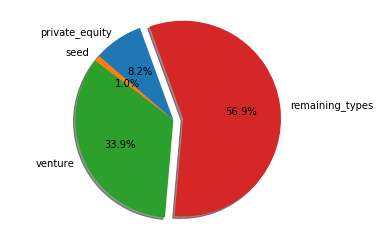

In [81]:
fig1, ax1 = plt.subplots()
ax1.pie(amount_array, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=110)
ax1.axis('equal')
plt.show()

In [101]:
plot1_1 = master_frame.groupby(['funding_round_type'])['permalink'].count().reset_index()#agg('sum').reset_index()
plot1_1

,funding_round_type,permalink
0,angel,6094
1,convertible_note,1817
2,debt_financing,6895
3,equity_crowdfunding,3257
4,grant,2200
5,non_equity_assistance,191
6,post_ipo_debt,152
7,post_ipo_equity,638
8,private_equity,2285
9,product_crowdfunding,410


In [107]:
plot1_11 = plot1_1[(plot1_1['funding_round_type']=='venture') | (plot1_1['funding_round_type']=='seed') | (plot1_1['funding_round_type']=='private_equity')]
plot1_11 = plot1_11.rename(columns={'permalink':'count'})

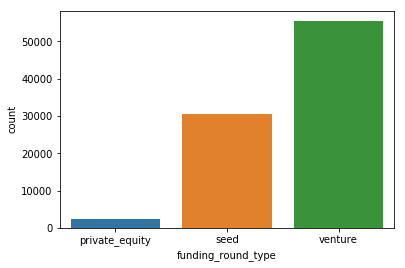

In [109]:
sns.barplot(x='funding_round_type', y='count', data=plot1_11)
plt.show()

In [110]:
top9

,country_code,raised_amount_usd
11,CHE,5.588196e+08
17,DEU,1.635026e+09
23,FRA,2.022425e+09
29,IND,2.186544e+09
32,ISR,2.250306e+09
10,CAN,3.192010e+09
13,CHN,3.861561e+09
24,GBR,4.941844e+09
68,USA,8.960135e+10


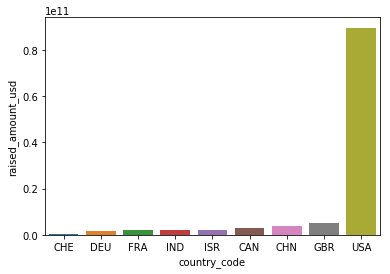

In [112]:
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.show()

In [113]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [118]:
final_frame = pd.concat([D1,D2,D3])
final_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value,main_sector_count,raised_amount_usd_sum
0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,479,4.119198e+09
1,/organization/newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,...,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,Media,Entertainment,1,479,4.119198e+09
2,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Media,Entertainment,1,479,4.119198e+09
3,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Media,Entertainment,1,479,4.119198e+09
4,/organization/plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,...,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,Media,Entertainment,1,479,4.119198e+09
5,/organization/songbird,Songbird,http://getsongbird.net/,Media|Mobile|Music|Open Source,closed,USA,CA,SF Bay Area,San Francisco,01-02-2006,...,/funding-round/61869a104bbc2ea3669f9b32459029b7,venture,A,01-12-2006,8000000.0,Media,Entertainment,1,479,4.119198e+09
6,/organization/vadio,Vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NaN,...,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7500000.0,Media,Entertainment,1,479,4.119198e+09
7,/organization/7-star-entertainment,7 Star Entertainment,http://www.7starent.com,Games,operating,USA,FL,Ft. Lauderdale,Pompano Beach,NaN,...,/funding-round/7db2e0412185f592d15df25f0e76c313,venture,NaN,14-07-2010,10000000.0,Games,Entertainment,1,479,4.119198e+09
8,/organization/8dworld,8D World,http://www.8dworld.com/English/Home.html,Games|Virtual Worlds,closed,USA,MA,Boston,Woburn,NaN,...,/funding-round/ab2db8ac1e851867a37b3880a2eda6b0,venture,B,09-12-2010,5250000.0,Games,Entertainment,1,479,4.119198e+09
9,/organization/8dworld,8D World,http://www.8dworld.com/English/Home.html,Games|Virtual Worlds,closed,USA,MA,Boston,Woburn,NaN,...,/funding-round/ca5833d22f42a788838850faf2774f3e,venture,A,01-03-2008,7000000.0,Games,Entertainment,1,479,4.119198e+09


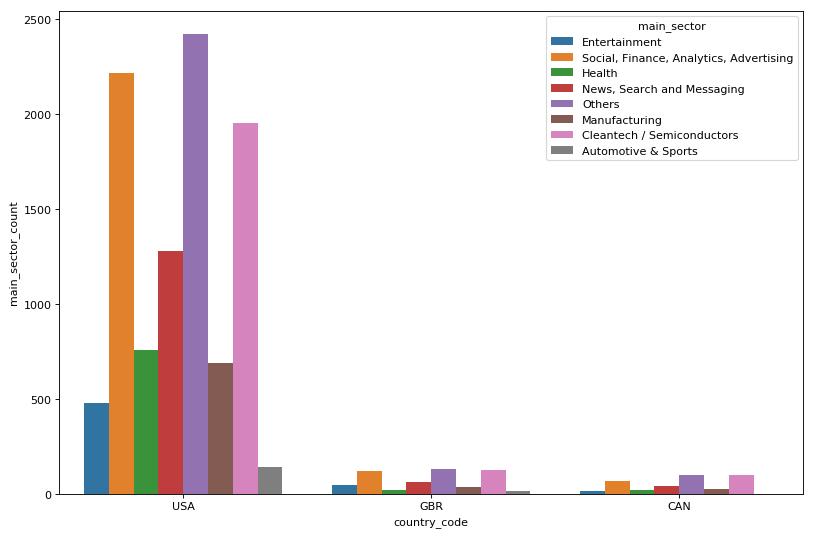

In [122]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='country_code', y='main_sector_count', hue="main_sector", data=final_frame, estimator=np.median)
plt.show()